In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import seaborn as sns
%matplotlib inline

np.random.seed(2)

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import itertools

from keras.utils.np_utils import to_categorical # convert to one-hot-encoding
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D
from keras.optimizers import RMSprop
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ReduceLROnPlateau

Using TensorFlow backend.


In [3]:
def readData(filename) -> (np.array, np.array):
    '''
    Read data from pattern-learn or pattern-test
    '''
    one_hots = []
    features = []
    with open(filename) as f:
        lines = f.readlines()
        for idx, line in enumerate(lines):
            eles = line.strip().split()
            features.append(list(map(float, eles[:96])))
            one_hots.append(list(map(int, eles[96:])))
            #print(idx, features, one_hots)
    labels = [np.argmax(oh) for oh in one_hots]
    return np.array(features), np.array(labels)

In [14]:
from sklearn.preprocessing import label_binarize
x_train_r, y_train_r = readData("../data/pattern-test")
x_test_r, y_test_r = readData("../data/pattern-learn")

x_total = np.concatenate((x_train_r, x_test_r))
y_total = np.concatenate((y_train_r, y_test_r))

y_bin = label_binarize(y_total, classes=[0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

n_classes = x_total.shape[1]
n_samples, n_features = x_total.shape

x_train, x_test, y_train, y_test = train_test_split(x_total,
                                                    y_total,
                                                    test_size=.3,
                                                    random_state=0)
x_df = pd.DataFrame(x_train)
y_df = pd.DataFrame(y_train)

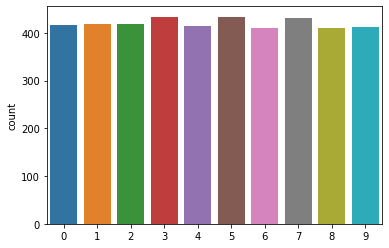

In [18]:
g = sns.countplot(y_train)


In [25]:
X_train = x_train.reshape(-1,12,8,1)


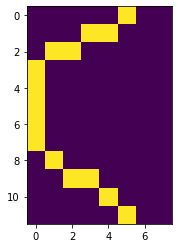

In [36]:
g = plt.imshow(X_train[12][:,:,0])
